# Matplotlib

데이터 분석의 시각화용으로 사용된 파이선 라이브러리

저수준의 그래픽 Plotting 라이브러리

오픈소스

대부분 파이썬으로 구현되었으며 일부분 C, Object-C, Javascript로 작성되었음

## matplotlib의 시작

In [1]:
import matplotlib
print(matplotlib.__version__)

2.2.2


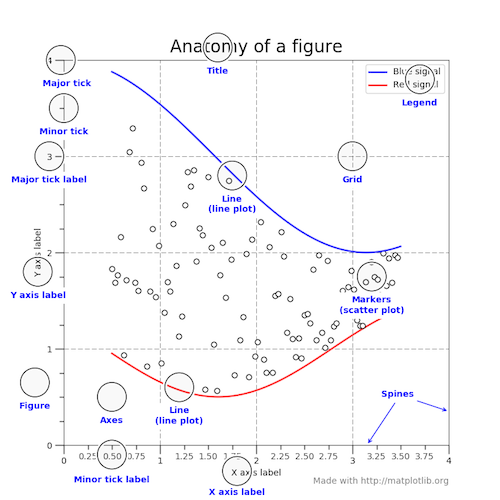

## Pyplot

matplotlib의 대부분 기능이 pyplot에 들어있음.

matlab 인터페이스와 유사히 구현, Object oriented API 의 Wrapper

보통 plt로 별명을 정의하여 사용

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## OO 식 접근법, 그래프를 좀 더 세밀하게 다룰 수 있음
fig = plt.figure(facecolor=(1, 0, 0, .1)) 

<Figure size 432x288 with 0 Axes>

In [4]:
plt.show()

In [5]:
fig = plt.figure(figsize=plt.figaspect(2.0), facecolor=(1, 0, 0, .1))
plt.show()

<Figure size 288x576 with 0 Axes>

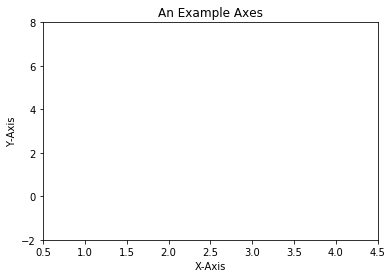

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

In [7]:
ax

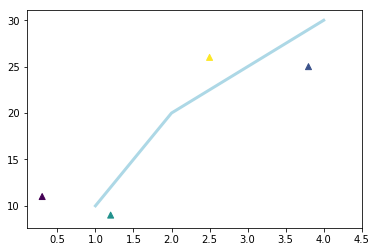

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.1, 4.5)
plt.show()

In [9]:
plt.show()

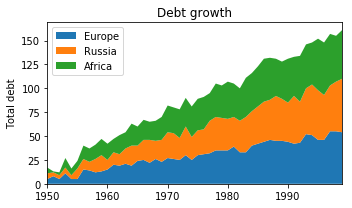

In [31]:
## 하나의 Figure와 Axes 생성 함수

rng = np.arange(50)
rnd = np.random.randint(0,10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs, rng+rnd, labels=['Europe', 'Russia','Africa'])
ax.set_title('Debt growth')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

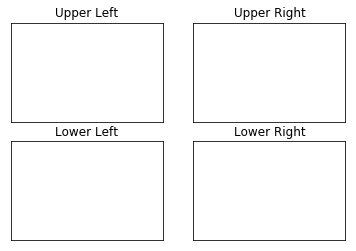

In [32]:
figs, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

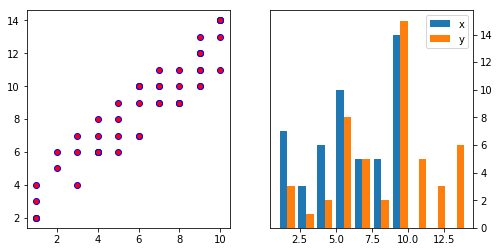

In [54]:
x = np.random.randint(1, 11, size=50)
y = x + np.random.randint(1,5, size=x.size)
data = np.column_stack((x,y))
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))
print(axes)
axes[0].scatter(x=x,y=y,marker='o', c='r', edgecolor='b')

axes[1].hist(data,label=('x','y'))
axes[1].legend()
axes[1].yaxis.tick_right()

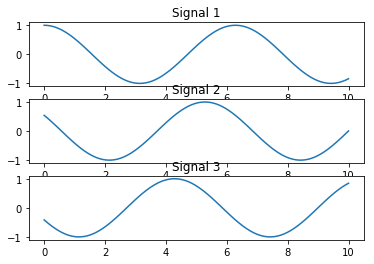

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Try to reproduce the figure shown in images/exercise_1-1.png
fig, axes = plt.subplots(nrows=3, ncols=1)
# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
axes[0].set(title=names[0])
axes[0].plot(x,y1)
axes[1].set(title=names[1])
axes[1].plot(x,y2)
axes[2].set(title=names[2])
axes[2].plot(x,y3)
plt.show()

In [56]:
plt.get_fignums()

[]

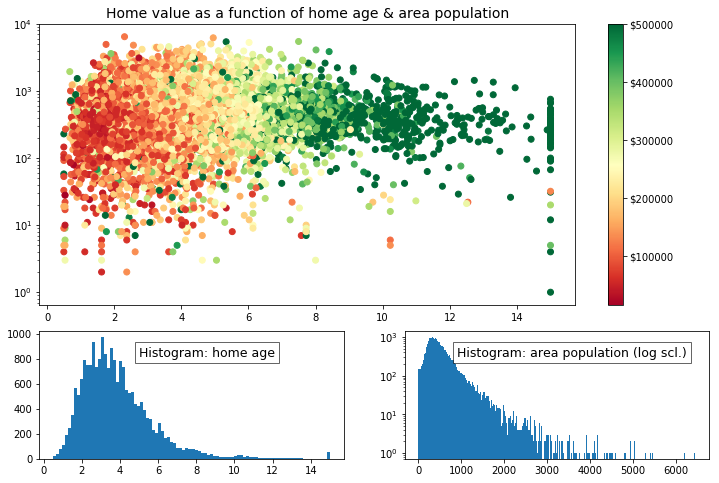

In [81]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

f = open('cal_housing.tgz','rb')
b = BytesIO(f.read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
    horizontalalignment='center',
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.6),
    fontsize=12.5)
    return ax

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

In [79]:
housing

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])